In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from method_wrapper import method_wrapper

In [2]:
# get all folder paths:

# set up paths
in_dir = "../Raw Data/Applied Acoustics/"
folders = sorted(os.listdir(in_dir))

# remove hidden folders
folders = [folder for folder in folders if '.' not in folder]
folders.pop(-1)

#methods = ["beamforming", "pseudo_intensity", "allrad_decoder", "allrad2_decoder", "mad_decoder", "reference"]
methods = ["beamforming", "pseudo_intensity", "reference"]

# create empty Dataframes to store results in
TS_results = pd.DataFrame()
TH_results = pd.DataFrame()
delta_results = pd.DataFrame()

# iterate through folders and methods
for folder in folders:
    print(folder)
    path = in_dir + folder + "/HOA/"
    print(path)
    for method in methods:
        try:
            TS, TH = method_wrapper(method, path)
            print(method, "TS:", TS, "TH:", TH)
        except:
            print(method, "not working")
            TS = None
            TH = None

        # save data
        TS_results.loc[folder, method] = TS
        TH_results.loc[folder, method] = TH
        try:
            delta_results.loc[folder, method] = TS - TH

        except:
            delta_results.loc[folder, method] = None


    print("")

A10p
../Raw Data/Applied Acoustics/A10p/HOA/
beamforming TS: 24.345310773635607 TH: -6.013554069010725
pseudo_intensity TS: -49.19950964234659 TH: -48.96428367487117
reference TS: -9.895755411213717 TH: -13.791350025954241

A11p
../Raw Data/Applied Acoustics/A11p/HOA/
beamforming TS: 2.459691197061812 TH: -2.0593287018005486
pseudo_intensity TS: -63.93754307075058 TH: -62.902358835579896
reference TS: -10.233450212369736 TH: -14.095861288582224

A20p
../Raw Data/Applied Acoustics/A20p/HOA/
beamforming TS: 24.335415264546345 TH: -4.092893860198384
pseudo_intensity TS: -41.206173697397276 TH: -40.79326210558011
reference TS: -8.842518871093564 TH: -12.914347216935909

A21p
../Raw Data/Applied Acoustics/A21p/HOA/
beamforming TS: 5.948817827934816 TH: 0.07086301082710883
pseudo_intensity TS: -31.865011142365258 TH: -31.029616945717123
reference TS: -9.012332585234502 TH: -13.052710182740752

A30p
../Raw Data/Applied Acoustics/A30p/HOA/
beamforming TS: -6.164579443408352 TH: 2.1976843466043

In [3]:
# create out folder
os.makedirs("../out", exist_ok=True)

# write dataframe to excel
with pd.ExcelWriter('../out/results.xlsx', engine='openpyxl') as writer:
    TS_results.to_excel(writer, sheet_name='TS')
    TH_results.to_excel(writer, sheet_name='TH')
    delta_results.to_excel(writer, sheet_name='delta')

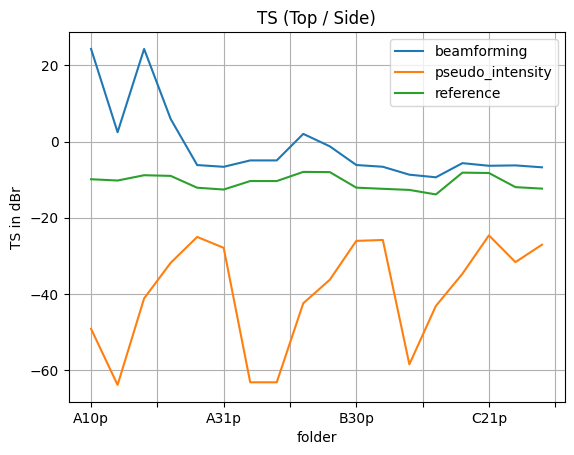

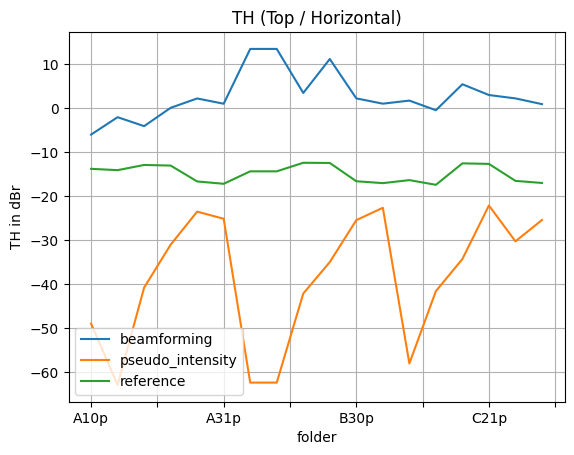

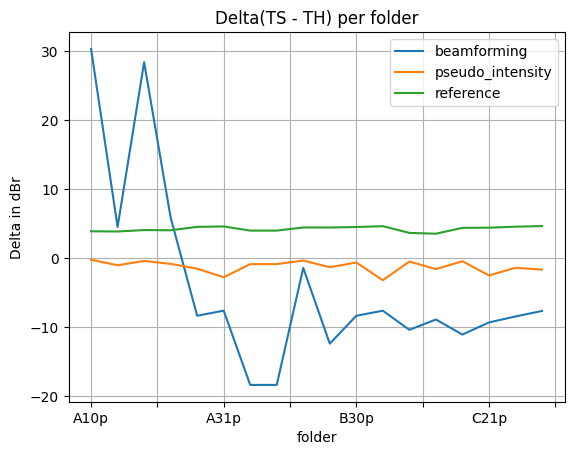

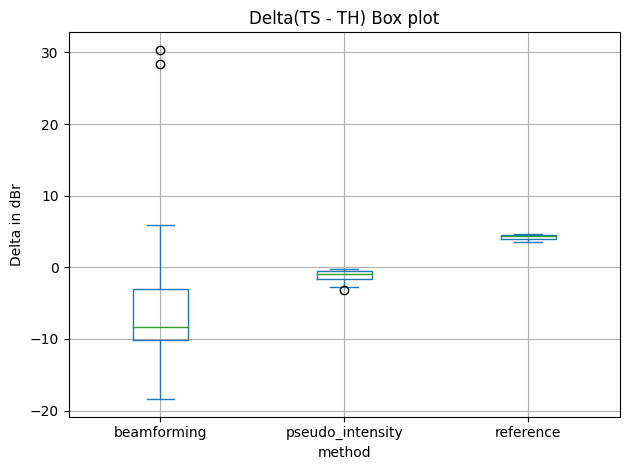

In [4]:
# plot and save results
 
TS_results.plot()
plt.title('TS (Top / Side)')
plt.xlabel('folder')
plt.ylabel('TS in dBr')
plt.grid()

plt.savefig('../out/TS.png')
plt.show()


TH_results.plot()
plt.title('TH (Top / Horizontal)')
plt.xlabel('folder')
plt.ylabel('TH in dBr')
plt.grid()

plt.savefig('../out/TH.png')
plt.show()


delta_results.plot()
plt.title('Delta(TS - TH) per folder')
plt.xlabel('folder')
plt.ylabel('Delta in dBr')
plt.grid()

plt.savefig('../out/Delta.png')
plt.show()


delta_results.plot(kind='box')
plt.title('Delta(TS - TH) Box plot')
plt.xlabel('method')
plt.ylabel('Delta in dBr')
plt.grid()
plt.tight_layout()
plt.savefig('../out/Delta_boxplot.png')
plt.show()
